In [48]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [3]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [4]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [5]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaler = StandardScaler()
crypto_scaled = scaler.fit_transform(df_market_data)

In [6]:
# Create a DataFrame with the scaled data

crypto_scaled = pd.DataFrame(crypto_scaled, columns = df_market_data.columns)

# Copy the crypto names from the original data

index = df_market_data.index
# Set the coinid column as index
crypto_scaled = crypto_scaled.set_index(index)

# Display sample data
crypto_scaled

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317
binancecoin,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533
chainlink,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284
cardano,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428
litecoin,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351


---

### Find the Best Value for k Using the Original Data.

In [7]:
# Create a list with the number of k-values from 1 to 11
k = list(range(1, 11))

In [11]:
# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list
for k in range(1,11):
    cluster=KMeans(n_clusters=k)
    cluster.fit(crypto_scaled) #Train the model
    inertia.append(cluster.inertia_)

In [33]:
# Create a dictionary with the data to plot the Elbow curve
elbow_dict = {"k": k, "inertia": inertia}

# Create a DataFrame with the data to plot the Elbow curve
df_plot = pd.DataFrame(inertia, index = range(1,11))

<AxesSubplot:>

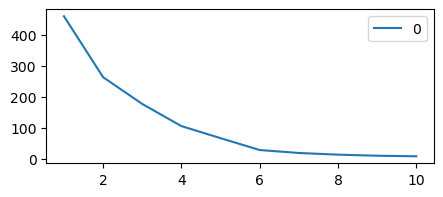

In [34]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
df_plot.plot(figsize=[5,2])

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** 4

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [14]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters = 4)

In [15]:
# Fit the K-Means model using the scaled data
model.fit(crypto_scaled)

KMeans(n_clusters=4)

In [16]:
# Predict the clusters to group the cryptocurrencies using the scaled data
crypto_scaled['cluster'] = cluster.predict(crypto_scaled)

# Print the resulting array of cluster values.
crypto_scaled['cluster']

coin_id
bitcoin                 0
ethereum                0
tether                  2
ripple                  2
bitcoin-cash            8
binancecoin             0
chainlink               0
cardano                 0
litecoin                0
bitcoin-cash-sv         2
crypto-com-chain        5
usd-coin                2
eos                     2
monero                  8
tron                    2
tezos                   0
okb                     2
stellar                 2
cosmos                  0
cdai                    2
neo                     5
wrapped-bitcoin         0
leo-token               2
huobi-token             2
nem                     9
binance-usd             2
iota                    2
vechain                 5
zcash                   0
theta-token             4
dash                    2
ethereum-classic        2
ethlend                 1
maker                   0
havven                  5
omisego                 7
celsius-degree-token    3
ontology                5
ftx-

In [17]:
# Create a copy of the DataFrame
cyrpto_cluster = crypto_scaled

In [18]:
# Add a new column to the DataFrame with the predicted clusters
# Display sample data
cyrpto_cluster.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,cluster
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,0
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,0
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,2
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,2
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,8


In [19]:
# Create a scatter plot using hvPlot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.

cyrpto_cluster.hvplot.scatter(x='price_change_percentage_24h', y='price_change_percentage_7d', by='cluster')
#coin_id

:NdOverlay   [cluster]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d)

---

### Optimize Clusters with Principal Component Analysis.

In [20]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)


In [21]:
# Use the PCA model with `fit_transform` to reduce to 
# three principal components.
crypto_pca = pca.fit_transform(crypto_scaled)
# View the first five rows of the DataFrame. 
crypto_pca[:5]

array([[-2.58463041, -0.51771921,  0.94153156],
       [-2.6736702 , -0.34582477,  0.57933245],
       [-0.48596423, -0.41687768, -0.18039069],
       [-0.55015841, -0.44519763, -0.22717313],
       [ 4.9928666 , -1.41419246,  1.82184466]])

In [22]:
# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component.
pca.explained_variance_ratio_

array([0.4799925 , 0.2004491 , 0.18691908])

In [23]:
sum(pca.explained_variance_ratio_)

0.8673606805303851

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** About 86% of the total variance is condensed into the 3 PCA variables.

In [25]:
# Create a new DataFrame with the PCA data.

# Creating a DataFrame with the PCA data
crypto_pca_df = pd.DataFrame(
    crypto_pca,
    columns=["PCA1", "PCA2", "PCA3"]
)

# Copy the crypto names from the original data

index = df_market_data.index
# Set the coinid column as index
crypto_pca_df = crypto_pca_df.set_index(index)

# Display sample data
crypto_pca_df.head()

,PCA1,PCA2,PCA3
coin_id,,,
bitcoin,-2.584630,-0.517719,0.941532
ethereum,-2.673670,-0.345825,0.579332
tether,-0.485964,-0.416878,-0.180391
ripple,-0.550158,-0.445198,-0.227173
bitcoin-cash,4.992867,-1.414192,1.821845


---

### Find the Best Value for k Using the PCA Data

In [26]:
# Create a list with the number of k-values from 1 to 11
k = list(range(1, 11))

In [27]:
# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list
for i in k:
    k_model = KMeans(n_clusters=i, random_state=0)
    k_model.fit(crypto_pca_df)
    inertia.append(k_model.inertia_)

In [29]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k, "inertia": inertia}
# Create a DataFrame with the data to plot the Elbow curve
crypto_elbow = pd.DataFrame(elbow_data)

In [30]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
crypto_elbow.hvplot.line(
    x="k", 
    y="inertia", 
    title="Elbow Curve", 
    xticks=k
)

:Curve   [k]   (inertia)

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** No, it doesn't.

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [37]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=4)

In [39]:
# Fit the K-Means model using the PCA data
model.fit(crypto_pca_df)

KMeans(n_clusters=4)

In [41]:
# Predict the clusters to group the cryptocurrencies using the PCA data
k_4 = model.predict(crypto_pca_df)
# Print the resulting array of cluster values.
k_4

array([0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 1, 0, 2, 2, 3, 2, 0, 0, 2],
      dtype=int32)

In [64]:
# Create a copy of the DataFrame with the PCA data
crypto_pca_predictions = crypto_pca_df.copy()

# Add a new column to the DataFrame with the predicted clusters
crypto_pca_predictions["clusters"] = k_4

# Display sample data
crypto_pca_predictions.head()

,PCA1,PCA2,PCA3,clusters
coin_id,,,,
bitcoin,-2.584630,-0.517719,0.941532,0
ethereum,-2.673670,-0.345825,0.579332,0
tether,-0.485964,-0.416878,-0.180391,0
ripple,-0.550158,-0.445198,-0.227173,0
bitcoin-cash,4.992867,-1.414192,1.821845,2


In [65]:
# Create a scatter plot using hvPlot by setting 
# `x="PC1"` and `y="PC2"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
crypto_pca_predictions.hvplot.scatter(
    x="PCA1",
    y="PCA2",
    by="clusters"
)

:NdOverlay   [clusters]
   :Scatter   [PCA1]   (PCA2)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

:Curve   [k]   (inertia)

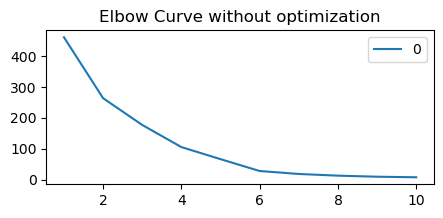

In [66]:
# Composite plot to contrast the Elbow curves
df_plot.plot(figsize=[5,2],title="Elbow Curve without optimization")

crypto_elbow.hvplot.line(
    x="k", 
    y="inertia", 
    title="Elbow Curve Optimization", 
    xticks=k
)

In [67]:
# Composite plot to contrast the clusters
# YOUR CODE HERE!
cyrpto_cluster.hvplot.scatter(x='price_change_percentage_24h', y='price_change_percentage_7d', by='cluster')


:NdOverlay   [cluster]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d)

In [68]:
crypto_pca_predictions.hvplot.scatter(
    x="PCA1",
    y="PCA2",
    by="clusters"
)

:NdOverlay   [clusters]
   :Scatter   [PCA1]   (PCA2)

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** The results are more ordered, which facilitates the handling and interpretation of the data.